In [159]:
import torch

def one_layer_relu_picnn(X, Y, Wy, Wyu, by, Wu, bu):
    forward_wo_softplus = ( Y * ( X @ Wyu.T + by) ) @ Wy.T  + X @ Wu.T + bu
    return torch.nn.functional.softplus(forward_wo_softplus, beta=1)

def one_layer_relu_picnn_y_grad(X, Y, Wy, Wyu, by, Wu, bu):
    forward_wo_softplus = ( Y * ( X @ Wyu.T + by) ) @ Wy.T  + X @ Wu.T + bu
    softplus_gradient = torch.exp(forward_wo_softplus) / (1 + torch.exp(forward_wo_softplus))
    return  softplus_gradient * Wy * (  X @ Wyu.T + by )

def torch_sphere_uniform(n, d, **kwargs):
    """Generate n points inside the d-dimensional sphere."""
    random_vectors = torch.randn(n, d, **kwargs)
    vectors_norms = torch.norm(random_vectors, dim=1, keepdim=True)
    radius = torch.pow(torch.rand(n, 1, **kwargs), 1. / d)
    return radius * random_vectors / vectors_norms

In [160]:
number_of_points, y_dimension, x_dimension, output_dimention = 1000, 3, 1, 1
u_dimension = y_dimension

U = torch_sphere_uniform(number_of_points, y_dimension)
U.requires_grad = True

X = torch.rand(1, 1).repeat(number_of_points, 1)

Wy = torch.randn(output_dimention, y_dimension)
Wyu = torch.randn(y_dimension, x_dimension)
by = torch.randn(y_dimension)
Wu = torch.randn(output_dimention, x_dimension)
bu = torch.randn(output_dimention)

forward_pass = one_layer_relu_picnn(X, U, Wy, Wyu, by, Wu, bu)
exact_gradient = torch.autograd.grad(forward_pass.sum(), U)[0]

with torch.no_grad():
    pushforward_u = one_layer_relu_picnn_y_grad(X, U, Wy, Wyu, by, Wu, bu)

print(torch.allclose(pushforward_u, exact_gradient))

True


In [161]:
number_of_points, y_dimension, x_dimension, output_dimention = 1000, 3, 1, 1

U = torch_sphere_uniform(number_of_points, y_dimension)
X = torch.rand(1, 1).repeat(number_of_points, 1)

Wy = torch.randn(output_dimention, y_dimension)
Wyu = torch.randn(y_dimension, x_dimension)
by = torch.randn(y_dimension)
Wu = torch.randn(output_dimention, x_dimension)
bu = torch.randn(output_dimention)

pushforward_u = one_layer_relu_picnn_y_grad(X, U, Wy, Wyu, by, Wu, bu)

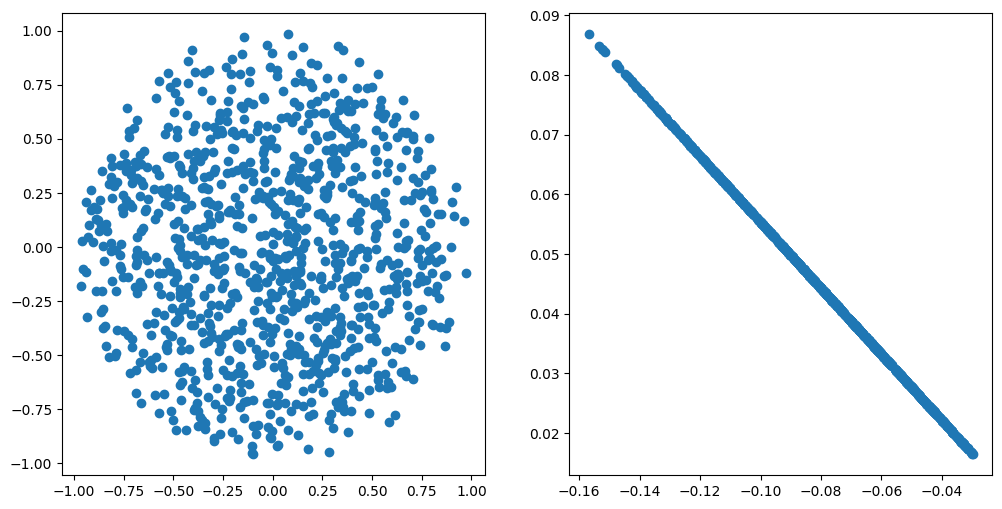

In [162]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.scatter(U[:, 0], U[:, 1])

ax2.scatter(pushforward_u[:, 0], pushforward_u[:, 1])
plt.show()